In [6]:
%load_ext autoreload
%autoreload 2

import keras
import keras.backend as K
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load some models

In [3]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
xception = keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
resnet50 = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
mobilenet = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
densenet = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [2]:
densenet32x32 = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32, 32, 3), pooling=None, classes=1000)
x = densenet32x32.get_layer(index=-1).output
top = keras.layers.Dense(1000, activation="softmax")(x)
densenet32x32_withtop = keras.models.Model(inputs=densenet32x32.inputs, outputs=top)

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
nasnet = keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
K.clear_session()

In [15]:
# Utility functions (may want to move to keras_utils.py)

from keras.preprocessing import image


def load_image(img, estimator=None):
    """
    Returns a single image as an array for an estimator's input
    img: one of: path to a single image file, PIL Image object, numpy array
    estimator: model instance, for resizing the image to the required input dimensions
    """
    # TODO: Take in PIL image object, or an array can also be multiple images.
    # "pipeline": path str -> PIL image -> numpy array
    xDims = None
    if estimator is not None:
        xDims = estimator.input_shape[1:3]
    im = image.load_img(img, target_size=xDims)
    x = image.img_to_array(im)

    # we need to insert an axis at the 0th position to indicate the batch size
    # this is required by the keras predict() function
    x = np.expand_dims(x, axis=0)
    return x


def applications_preprocessing(x, estimator):
    """
    Apply preprocess_input function in keras.applications for input
    x: image array,
    estimator: estimator instance, one from keras.applications
    """
    try:
        name = estimator.name.lower()
        f = getattr(keras.applications, name).preprocess_input
    except AttributeError:
        raise AttributeError('Could not get the preprocessing function')
    else:
        x = f(x)
        return x


In [21]:
import eli5
import os
import matplotlib.pyplot as plt

def show_dir(model, img_dir, *args, **kwargs):
    imgs = os.listdir(img_dir)
    for i, img in enumerate(imgs):
        I = show(model, os.path.join(img_dir, img), *args, **kwargs)

def show(model, doc, *args, preprocess=False, preprocess_fn=None, **kwargs):
    if preprocess:
        doc = load_image(doc, model)
        if preprocess_fn:
            doc = preprocess_fn(doc)
    E = eli5.explain_prediction(model, doc, *args, **kwargs)
    I = eli5.formatters.image.format_as_image(E)
    return I

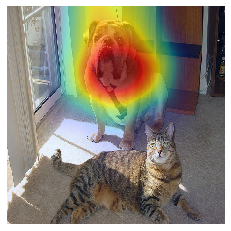

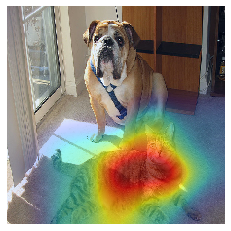

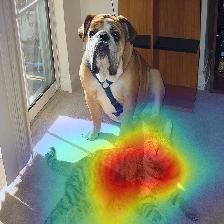

In [24]:
img = 'examples/cat_dog.jpg'
img2 = 'examples/170997360_8193925eef.jpg'

cat_cls = [282]
window_cls = [904]
snake_cls = [59]

# show(vgg16, img, layers="block5_conv3", preprocessing=keras.applications.vgg16.preprocess_input)


# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[282], target_decoder=keras.applications.xception.decode_predictions) # 'tiger cat'
# show(xception, img, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[904], target_decoder=keras.applications.xception.decode_predictions) # 'window screen'
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=None, target_decoder=keras.applications.xception.decode_predictions)
# show(xception, img2, layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input, 
#      targets=[59], target_decoder=keras.applications.xception.decode_predictions) # 'vine snake'
# show_dir(xception, 'examples/', layers="block14_sepconv2_act", preprocessing=keras.applications.xception.preprocess_input)

# show(resnet50, img, preprocessing=keras.applications.resnet50.preprocess_input, layer=-3)


# mobilenet.summary()
# show(mobilenet, img, preprocessing=keras.applications.mobilenet.preprocess_input, layer=-3)
# -7 -> works
# -6 -> too many indices
# -5 downwards (even conv_preds) -> all red
# show(mobilenet, img, preprocess=True, layer=-8)


# from keras.datasets import cifar10
# import numpy as np
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# # print(x_test.shape)
# x = x_test[1]
# x = np.expand_dims(x, axis=0)
# densenet32x32_withtop.summary()
# show(densenet32x32_withtop, x, preprocess=False, layer="conv1/conv")
# show(densenet32x32_withtop, x, preprocess=False, prediction_decoder=keras.applications.densenet.decode_predictions, layer=-10)
# -> ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1, 1, 1000)


# TESTMODELS = [
# #     (xception, keras.applications.xception.preprocess_input, "block14_sepconv2_act"),
#     (resnet50, keras.applications.resnet50.preprocess_input),
#     (mobilenet, keras.applications.mobilenet.preprocess_input),
#     (densenet, keras.applications.densenet.preprocess_input),
#     (nasnet, keras.applications.nasnet.preprocess_input),
# ]
# for model, preprocess_fn in TESTMODELS:
#     print(model.name)
#     show_dir(model, 'examples', layers="block14_sepconv2_act", preprocessing=preprocess_fn)
#     print('='*50, end='\n\n\n')


# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(resnet50, 'examples/cat_dog.jpg', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)


# def f(x):
#     return x*0
# show(nasnet, img, preprocess=True, prediction_decoder=keras.applications.nasnet.decode_predictions)
# nasnet.summary()
# print(len(nasnet.layers))
# for l in [-405, -205, -5]:
#     show(nasnet, img, preprocess=True, layer=l, targets=[282])

show(densenet, img, preprocess=True, preprocess_fn=keras.applications.densenet.preprocess_input)
show(densenet, img, preprocess=True, preprocess_fn=keras.applications.densenet.preprocess_input, targets=cat_cls)

In [29]:
# Custom model

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(24,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

print(model.summary())
x = np.ones((1, 24))

import eli5
eli5.explain_prediction(model, x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                800       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________
None
dispatched


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 166s 1us/step


In [3]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 146s 1us/step


In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step
